In [28]:
from spectrm_challenge_ryan.helpers import SpectrmLoader
from spectrm_challenge_ryan.models import WordFrequency
import pandas as pd
import numpy as np

In [2]:
loader = SpectrmLoader()
data = loader.load()

In [3]:
wf_corpus = WordFrequency()
wf_corpus.get_unique_non_stop_words(data['train_dialogs'])

In [4]:
labels = data['train_dialogs'].index.unique()[:100]

In [5]:
print len(labels)
print len(wf_corpus.unique_non_stop_words)

100
26532


In [15]:
input_mat = {}
target_mat = {}
wf_input = WordFrequency()
wf_target = WordFrequency()
for label in labels:
    wf_input.get_unique_non_stop_words(data['train_dialogs'].ix[label])
    wf_target.get_unique_non_stop_words(data['train_missing'].ix[label].text)
    input_mat[label] = wf_corpus.unique_non_stop_words.isin(wf_input.unique_non_stop_words)
    input_mat[label].index = wf_corpus.unique_non_stop_words.values
    target_mat[label] = wf_corpus.unique_non_stop_words.isin(wf_target.unique_non_stop_words)
    target_mat[label].index = wf_corpus.unique_non_stop_words.values

In [25]:
train_dialog_vectors = pd.DataFrame(input_mat).T.astype('float')
train_vectors.shape

(100, 26532)

In [26]:
train_missing_vectors = pd.DataFrame(target_mat).T.astype('float')
train_missing_vectors.shape

(100, 26532)

In [32]:
t = np.dot(train_dialog_vectors.values, train_missing_vectors.values.T)

In [31]:
%matplotlib inline

/home/ryan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


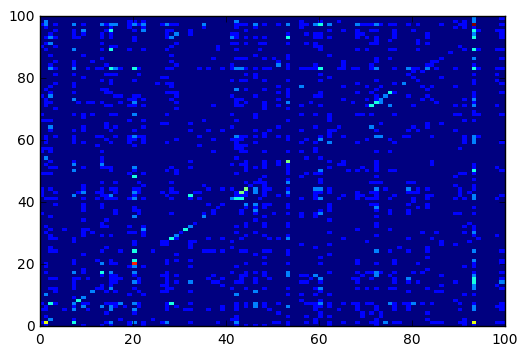

In [33]:
from matplotlib import pyplot as plt
heatmap = plt.pcolor(t)